In [49]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.stats import norm
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [50]:
c = 299792458
h = 4.135668e-15
d = 3.295e-10
gauss_kbr= pd.read_csv('./Dados2/kbr_sem.csv',sep='\s', decimal=',')
gauss_kbr_sem_x = np.array(gauss_kbr['Ângulo'])
gauss_kbr_sem_y = np.array(gauss_kbr['R'])
gauss_kbr_x_sem_e = 1e-3 * h*c/(2*d*np.sin(gauss_kbr_sem_x * np.pi/180))

gauss_kbr = pd.read_csv('./Dados2/kbr_al.csv',sep='\s', decimal=',')
gauss_kbr_x = np.array(gauss_kbr['Ângulo'])
gauss_kbr_y = np.array(gauss_kbr['R'])
gauss_kbr_x_e = 1e-3 * h*c/(2*d*np.sin(gauss_kbr_sem_x * np.pi/180))
gauss_kbr_y_abs = np.divide(gauss_kbr_sem_y, gauss_kbr_y)

C:\Users\victo\AppData\Local\Temp\ipykernel_7156\1110087676.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_kbr= pd.read_csv('./Dados2/kbr_sem.csv',sep='\s', decimal=',')
C:\Users\victo\AppData\Local\Temp\ipykernel_7156\1110087676.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_kbr = pd.read_csv('./Dados2/kbr_al.csv',sep='\s', decimal=',')


In [51]:
# Dados para o plot
y_ln_a = np.log(gauss_kbr_y_abs)

In [52]:
def func(x, g, b):
    return -g*(x) + b

def func_fit(dados_x, dados_y):
    popt, pcov = curve_fit(
    f = func,
    xdata = dados_x,
    ydata = dados_y,
    maxfev=100000
    )
    return [popt, np.sqrt(np.diag(pcov))]

In [53]:
i = np.argmax(gauss_kbr_y_abs[15:]) + 15
i

39

In [54]:
gauss_kbr_y_abs[i]

2.049786628733997

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


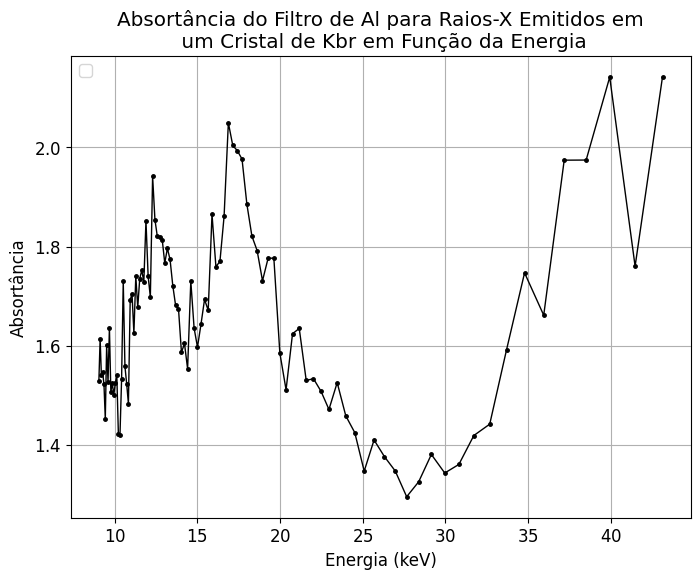

In [59]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

# plot dos pontos:
# grafico3 = grafico.plot(gauss_kbr_x, gauss_kbr_y, marker = '.', markersize=5, color = 'blue', linewidth = 1)
# grafico3 = grafico.plot(gauss_kbr_x, gauss_kbr_sem_y, marker = '.', markersize=5, color = 'red', linewidth = 1)
grafico3 = grafico.plot(gauss_kbr_x_e, gauss_kbr_y_abs, marker = '.', markersize=5, color = 'black', linewidth = 1)



# plot do ajuste


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Absortância') # eixo y
grafico.set_title('Absortância do Filtro de Al para Raios-X Emitidos em\n um Cristal de Kbr em Função da Energia') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [56]:
teste_x = np.flip(gauss_kbr_x_e[16:42])
teste_x, y_ln_a[16:42]

(array([16.36893899, 16.61966247, 16.87823833, 17.14504046, 17.42046692,
        17.70494185, 17.99891766, 18.30287745, 18.61733762, 18.94285083,
        19.28000918, 19.62944788, 19.99184915, 20.36794672, 20.75853076,
        21.1644534 , 21.58663496, 22.02607088, 22.48383955, 22.96111114,
        23.45915758, 23.97936385, 24.52324084, 25.09243999, 25.68877003,
        26.31421614]),
 array([0.31912941, 0.34319073, 0.29755572, 0.35366174, 0.3771553 ,
        0.42217859, 0.38596671, 0.41051562, 0.42736072, 0.42499025,
        0.49141617, 0.48487379, 0.41262427, 0.46056379, 0.57473397,
        0.57444512, 0.54864993, 0.58329884, 0.5994049 , 0.63412189,
        0.68134376, 0.68991964, 0.69517435, 0.7177357 , 0.62100562,
        0.5709188 ]))

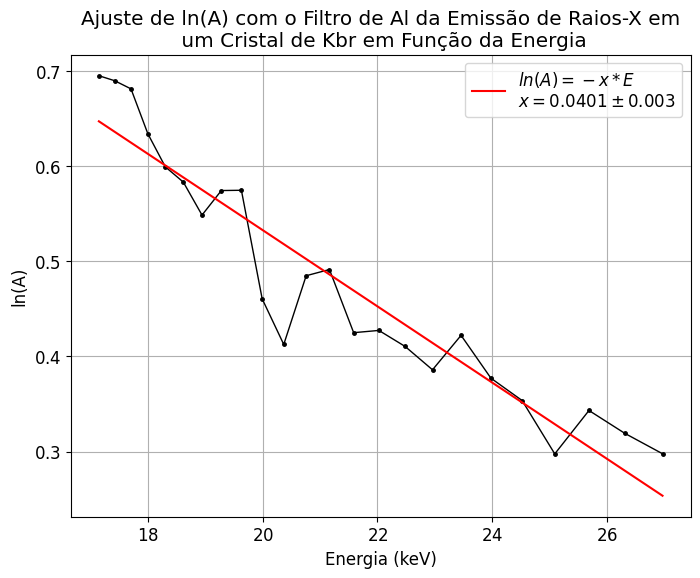

In [57]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)
def func_plot(dados_x, dados_y, color_plot):
    par = func_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = func(x_model, par[0][0], par[0][1])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$ln(A) = -x*E$\n$x = {par[0][0]:.3} \pm {par[1][0]:.1}$')

# plot dos pontos:
# grafico3 = grafico.plot(gauss_kbr_x, gauss_kbr_y, marker = '.', markersize=5, color = 'blue', linewidth = 1)
# grafico3 = grafico.plot(gauss_kbr_x, gauss_kbr_sem_y, marker = '.', markersize=5, color = 'red', linewidth = 1)
grafico3 = grafico.plot(gauss_kbr_x_e[15:i], y_ln_a[15:i], marker = '.', markersize=5, color = 'black', linewidth = 1)



# plot do ajuste
func_plot(np.flip(gauss_kbr_x_e[15:i]), np.flip(y_ln_a[15:i]), 'red')

grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('ln(A)') # eixo y
grafico.set_title('Ajuste de ln(A) com o Filtro de Al da Emissão de Raios-X em\n um Cristal de Kbr em Função da Energia') #título
grafico.legend(loc = 'upper right', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [58]:
np.flip(gauss_kbr_x_e[16:42]), np.flip(y_ln_a[16:42])

(array([16.36893899, 16.61966247, 16.87823833, 17.14504046, 17.42046692,
        17.70494185, 17.99891766, 18.30287745, 18.61733762, 18.94285083,
        19.28000918, 19.62944788, 19.99184915, 20.36794672, 20.75853076,
        21.1644534 , 21.58663496, 22.02607088, 22.48383955, 22.96111114,
        23.45915758, 23.97936385, 24.52324084, 25.09243999, 25.68877003,
        26.31421614]),
 array([0.5709188 , 0.62100562, 0.7177357 , 0.69517435, 0.68991964,
        0.68134376, 0.63412189, 0.5994049 , 0.58329884, 0.54864993,
        0.57444512, 0.57473397, 0.46056379, 0.41262427, 0.48487379,
        0.49141617, 0.42499025, 0.42736072, 0.41051562, 0.38596671,
        0.42217859, 0.3771553 , 0.35366174, 0.29755572, 0.34319073,
        0.31912941]))